In [1]:
import re
import pandas as pd
import numpy as np
import random
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt

In [2]:
!pip install ipynb

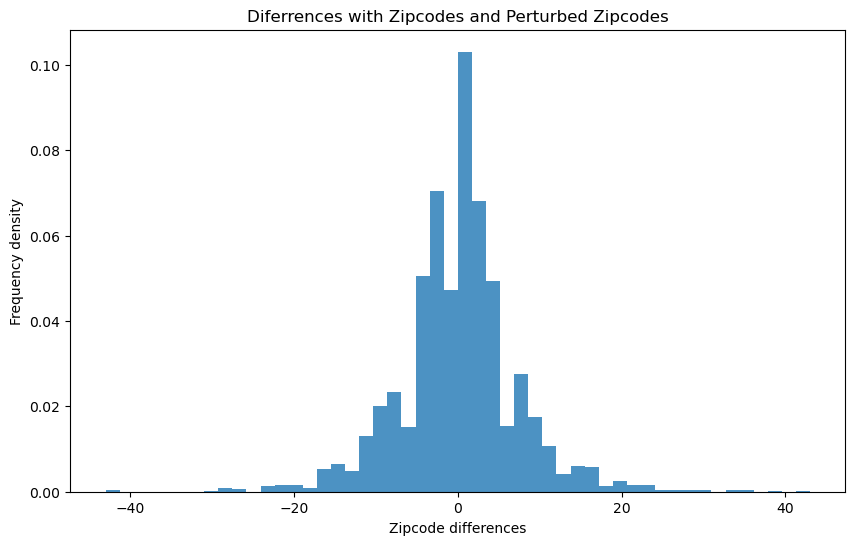

In [3]:
from ipynb.fs.full.dp_mechanisms import perturb_data,visualize_perturbation

In [4]:
train_dataset='../datasets/credit_card_fraud_train_dataset_v3.csv'
test_dataset='../datasets/credit_card_fraud_test_dataset_v3.csv'
train_dataset_with_dp='../datasets/credit_card_fraud_train_dataset_with_dp_v3.csv'
test_dataset_with_dp='../datasets/credit_card_fraud_test_dataset_with_dp_v3.csv'

In [5]:
with open(train_dataset) as fd:
    numcols = len(fd.readline().split(','))
traindf = pd.read_csv(train_dataset, usecols=range(1,numcols))

In [6]:
with open(test_dataset) as fd:
    numcols = len(fd.readline().split(','))
testdf = pd.read_csv(test_dataset, usecols=range(1,numcols))

In [7]:
# Take a copy before we apply to make some sanity test
train_df_zipcodes=traindf['zip']
train_df_zip_exts=traindf['zip_ext']

In [8]:
display(traindf[traindf['first'] == 'Alice'])
display(traindf[traindf['first'] == 'Steven'])

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,zip_ext,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Instructions,Input,Output,text
169,6506982560413523,"fraud_Champlin, Rolfson and Connelly",travel,9.18,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,e28962f1bfb187116b89c32b047cbe19,1357941655,34.083636,-94.511893,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:Provide...","\n### Response:\nName:Alice,Kemp bought goods ...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
219,6506982560413523,"fraud_Bernhard, Grant and Langworth",shopping_pos,26.64,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,5b654e18d2c978b496d997769e8e189e,1352549246,32.562957,-94.041026,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Bernhard, Grant and Langwo...","\n### Response:\nBernhard, Grant and Langworth...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
1266,6506982560413523,fraud_Towne LLC,misc_pos,48.41,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,b859e5e1efc68bab160d62b9fca294b0,1369471124,34.198593,-94.504097,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:If the ...","\n### Response:\nAlice,Kemp didn't defraud.\n<...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
2291,6506982560413523,"fraud_Roberts, Daniel and Macejkovic",kids_pets,96.93,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,ffc8703831ac3d5dfafa0048fbda7914,1330463391,33.746208,-94.311390,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...",\n### Input:\nCredit Card #: 6506982560413523\...,"\n### Response:\nName:Alice,Kemp\nAddr:057 Mar...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
2961,6506982560413523,fraud_Hills-Boyer,personal_care,20.62,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,6fc2a2f2119ccf391ce4e1737a641236,1357944712,33.648778,-93.226031,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:Provide...","\n### Response:\nName:Alice,Kemp bought goods ...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3113,6506982560413523,"fraud_Little, Gutmann and Lynch",shopping_net,123.45,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,7c158c5933da350fc684040f7b4a7282,1338912083,32.520917,-93.171272,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nCredit Card # ...",\n### Response:\nST:057 Martinez Radial\nCTY:T...,"<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3473,6506982560413523,"fraud_Durgan, Gislason and Spencer",home,132.31,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,e0687c40b15c922fbb72217abede9c60,1333034762,32.935467,-94.785803,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...",\n### Input:\nCredit Card #: 6506982560413523\...,"\n### Response:\nName:Alice,Kemp\nAddr:057 Mar...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3475,6506982560413523,fraud_Kutch-Wilderman,home,268.44,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,1b5a3c84461d21108efeda199aa4a640,1357942968,32.698030,-93.078089,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nCredit Card # ...",\n### Response:\nST:057 Martinez Radial\nCTY:T...,"<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
5975,6506982560413523,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,105.45,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71854,7073,33.431,-93.8765,36438,Surgeon,1985-04-15,4cbd6de2265c5959fe4c4ede54e6b5a8,1330533813,32.876637,-94.832177,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo.

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,zip_ext,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Instructions,Input,Output,text
3,6011360759745864,fraud_Morissette LLC,entertainment,68.15,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,5023,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,67644522ba430afd94affcf415676c0e,1364897570,38.732672,-79.278112,0,"<s>\n### Instruction:\nSteven,Williams, a Male...","\n### Input: \nName:Steven,Williams\nCredit Ca...",\n### Response:\nST:231 Flores Pass Suite 720\...,"<s>\n### Instruction:\nSteven,Williams, a Male..."
33,6569097840281287,fraud_Marvin-Lind,personal_care,8.41,Steven,Johnson,M,7470 John Tunnel Suite 937,Aurora,CO,80014,6866,39.6662,-104.8350,389246,"Scientist, marine",1969-12-12,ed14e66ff46f425f4a8736ffa5875c71,1348072857,38.821840,-105.314800,0,"<s>\n### Instruction:\nSteven,Johnson, a Male ...","\n### Input: \nName:Steven,Johnson\nPrompt:If ...","\n### Response:\nSteven,Johnson didn't defraud...","<s>\n### Instruction:\nSteven,Johnson, a Male ..."
154,3514897282719543,fraud_Kuhn LLC,shopping_pos,102.23,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14425,1774,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,4010b5f93bda0c493a1e6e15e41a4dc2,1366362272,42.132468,-77.707556,0,"<s>\n### Instruction:\nSteven,Faulkner, a Male...",\n### Input: \nName:Kuhn LLC\nPrompt:Was this ...,\n### Response:\nKuhn LLC wasn't defrauded.\n<...,"<s>\n### Instruction:\nSteven,Faulkner, a Male..."
604,4476840372112,"fraud_Bernhard, Grant and Langworth",shopping_pos,2.36,Steven,Walters,M,3206 Hall Divide Suite 282,Woodville,AL,35776,2833,34.6689,-86.2296,3395,"Editor, commissioning",1979-01-21,e7ec4b4b00ad045d4140743fcd329513,1351369780,34.181690,-85.961939,0,"<s>\n### Instruction:\nSteven,Walters, a Male ...",\n### Input:\nCredit Card #: 4476840372112\nPr...,"\n### Response:\nName:Steven,Walters\nAddr:320...","<s>\n### Instruction:\nSteven,Walters, a Male ..."
631,4060579726528237,"fraud_Denesik, Powlowski and Pouros",home,76.91,Steven,Sanders,M,25955 Amy Via,Ozawkie,KS,66070,6203,39.2136,-95.4404,2661,Theatre director,1948-11-14,1eb96e6a5aa27f9d82a701e4cffa97c9,1342964548,39.313908,-95.873440,0,"<s>\n### Instruction:\nSteven,Sanders, a Male ...",\n### Input:\nCredit Card #: 4060579726528237\...,"\n### Response:\nName:Steven,Sanders\nAddr:259...","<s>\n### Instruction:\nSteven,Sanders, a Male ..."
751,213124978348176,fraud_Rau and Sons,grocery_pos,355.13,Steven,Arnold,M,079 Chelsea Rest,Belfast,NY,14711,5551,42.3200,-78.0943,1766,Mechanical engineer,1962-06-04,4c494691fba31c6a29376f1f42e26370,1338175720,43.083104,-77.712902,1,"<s>\n### Instruction:\nSteven,Arnold, a Male b...","\n### Input: \nName:Steven,Arnold\nPrompt:Prov...","\n### Response:\nName:Steven,Arnold bought goo...","<s>\n### Instruction:\nSteven,Arnold, a Male b..."
857,3514897282719543,fraud_Carroll PLC,health_fitness,7.59,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14425,1774,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,0fe0b4484460825854d0c0de957c7ebf,1330456361,42.807246,-77.563098,0,"<s>\n### Instruction:\nSteven,Faulkner, a Male...","\n### Input: \nName:Steven,Faulkner\nPrompt:If...","\n### Response:\nSteven,Faulkner didn't defrau...","<s>\n### Instruction:\nSteven,Faulkner, a Male..."
980,6011360759745864,"fraud_Windler, Goodwin and Kovacek",home,164.99,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22824,5023,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,237cbdbfe93e4fce1927d0eef7fde138,1327241904,37.851485,-78.073153,0,"<s>\n### Instruction:\nSteven,Williams, a Male...",\n### Input:\nCredit Card #: 6011360759745864\...,"\n### Response:\nName:Steven,Williams\nAddr:23...","<s>\n### Instruction:\nSteven,Williams, a Male..."
1002,213124978348176,"fraud_Goldner, Kovacek and Abbott",grocery_pos,338.62,Steven,Arnold,M,079 Chelsea Rest,Belfast,NY,14711,5551,42.3200,-78.0943,1766,Mechanical engineer,1962

In [9]:
epsilon=0.1

In [10]:
def apply_dp_to_zipcode(df, epsilon):
    zipcode = df['zip']
    zip_ext = df['zip_ext']
    df['zip'] = df.groupby(['first', 'last'])['zip'].transform(lambda x: perturb_data(x.iloc[0], epsilon=epsilon)[0])
    df['zip_ext'] = df.groupby(['first', 'last'])['zip_ext'].transform(lambda x: perturb_data(x.iloc[0], epsilon=epsilon)[0])
    zipcode_with_dp = df['zip']
    zip_ext_with_dp = df['zip_ext']
    visualize_perturbation(zipcode, zipcode_with_dp, 
                           f'Laplace Zipcode Perturbations with epsilon={epsilon}',
                           'Zipcode differences',
                           'Frequency counts', density=False)
    return

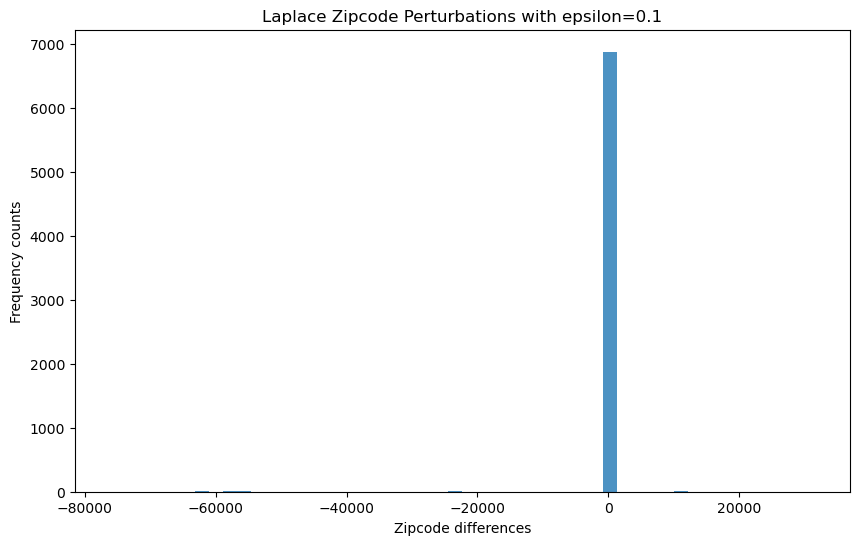

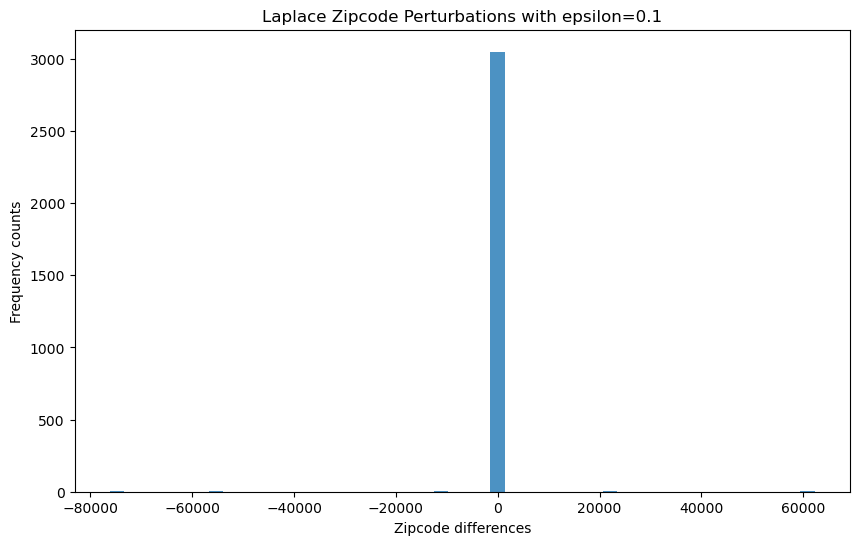

In [11]:
apply_dp_to_zipcode(traindf, epsilon)
apply_dp_to_zipcode(testdf, epsilon)

In [12]:
display(traindf[traindf['first'] == 'Alice'])
display(traindf[traindf['first'] == 'Steven'])

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,zip_ext,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Instructions,Input,Output,text
169,6506982560413523,"fraud_Champlin, Rolfson and Connelly",travel,9.18,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,e28962f1bfb187116b89c32b047cbe19,1357941655,34.083636,-94.511893,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:Provide...","\n### Response:\nName:Alice,Kemp bought goods ...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
219,6506982560413523,"fraud_Bernhard, Grant and Langworth",shopping_pos,26.64,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,5b654e18d2c978b496d997769e8e189e,1352549246,32.562957,-94.041026,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Bernhard, Grant and Langwo...","\n### Response:\nBernhard, Grant and Langworth...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
1266,6506982560413523,fraud_Towne LLC,misc_pos,48.41,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,b859e5e1efc68bab160d62b9fca294b0,1369471124,34.198593,-94.504097,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:If the ...","\n### Response:\nAlice,Kemp didn't defraud.\n<...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
2291,6506982560413523,"fraud_Roberts, Daniel and Macejkovic",kids_pets,96.93,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,ffc8703831ac3d5dfafa0048fbda7914,1330463391,33.746208,-94.311390,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...",\n### Input:\nCredit Card #: 6506982560413523\...,"\n### Response:\nName:Alice,Kemp\nAddr:057 Mar...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
2961,6506982560413523,fraud_Hills-Boyer,personal_care,20.62,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,6fc2a2f2119ccf391ce4e1737a641236,1357944712,33.648778,-93.226031,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nPrompt:Provide...","\n### Response:\nName:Alice,Kemp bought goods ...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3113,6506982560413523,"fraud_Little, Gutmann and Lynch",shopping_net,123.45,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,7c158c5933da350fc684040f7b4a7282,1338912083,32.520917,-93.171272,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nCredit Card # ...",\n### Response:\nST:057 Martinez Radial\nCTY:T...,"<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3473,6506982560413523,"fraud_Durgan, Gislason and Spencer",home,132.31,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,e0687c40b15c922fbb72217abede9c60,1333034762,32.935467,-94.785803,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...",\n### Input:\nCredit Card #: 6506982560413523\...,"\n### Response:\nName:Alice,Kemp\nAddr:057 Mar...","<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
3475,6506982560413523,fraud_Kutch-Wilderman,home,268.44,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,1b5a3c84461d21108efeda199aa4a640,1357942968,32.698030,-93.078089,1,"<s>\n### Instruction:\nAlice,Kemp, a Female bo...","\n### Input: \nName:Alice,Kemp\nCredit Card # ...",\n### Response:\nST:057 Martinez Radial\nCTY:T...,"<s>\n### Instruction:\nAlice,Kemp, a Female bo..."
5975,6506982560413523,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,105.45,Alice,Kemp,F,057 Martinez Radial,Texarkana,AR,71848,7075,33.431,-93.8765,36438,Surgeon,1985-04-15,4cbd6de2265c5959fe4c4ede54e6b5a8,1330533813,32.876637,-94.832177,0,"<s>\n### Instruction:\nAlice,Kemp, a Female bo.

,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,zip_ext,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Instructions,Input,Output,text
3,6011360759745864,fraud_Morissette LLC,entertainment,68.15,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22827,5041,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,67644522ba430afd94affcf415676c0e,1364897570,38.732672,-79.278112,0,"<s>\n### Instruction:\nSteven,Williams, a Male...","\n### Input: \nName:Steven,Williams\nCredit Ca...",\n### Response:\nST:231 Flores Pass Suite 720\...,"<s>\n### Instruction:\nSteven,Williams, a Male..."
33,6569097840281287,fraud_Marvin-Lind,personal_care,8.41,Steven,Johnson,M,7470 John Tunnel Suite 937,Aurora,CO,80015,6879,39.6662,-104.8350,389246,"Scientist, marine",1969-12-12,ed14e66ff46f425f4a8736ffa5875c71,1348072857,38.821840,-105.314800,0,"<s>\n### Instruction:\nSteven,Johnson, a Male ...","\n### Input: \nName:Steven,Johnson\nPrompt:If ...","\n### Response:\nSteven,Johnson didn't defraud...","<s>\n### Instruction:\nSteven,Johnson, a Male ..."
154,3514897282719543,fraud_Kuhn LLC,shopping_pos,102.23,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14420,1775,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,4010b5f93bda0c493a1e6e15e41a4dc2,1366362272,42.132468,-77.707556,0,"<s>\n### Instruction:\nSteven,Faulkner, a Male...",\n### Input: \nName:Kuhn LLC\nPrompt:Was this ...,\n### Response:\nKuhn LLC wasn't defrauded.\n<...,"<s>\n### Instruction:\nSteven,Faulkner, a Male..."
604,4476840372112,"fraud_Bernhard, Grant and Langworth",shopping_pos,2.36,Steven,Walters,M,3206 Hall Divide Suite 282,Woodville,AL,35777,2837,34.6689,-86.2296,3395,"Editor, commissioning",1979-01-21,e7ec4b4b00ad045d4140743fcd329513,1351369780,34.181690,-85.961939,0,"<s>\n### Instruction:\nSteven,Walters, a Male ...",\n### Input:\nCredit Card #: 4476840372112\nPr...,"\n### Response:\nName:Steven,Walters\nAddr:320...","<s>\n### Instruction:\nSteven,Walters, a Male ..."
631,4060579726528237,"fraud_Denesik, Powlowski and Pouros",home,76.91,Steven,Sanders,M,25955 Amy Via,Ozawkie,KS,66088,6246,39.2136,-95.4404,2661,Theatre director,1948-11-14,1eb96e6a5aa27f9d82a701e4cffa97c9,1342964548,39.313908,-95.873440,0,"<s>\n### Instruction:\nSteven,Sanders, a Male ...",\n### Input:\nCredit Card #: 4060579726528237\...,"\n### Response:\nName:Steven,Sanders\nAddr:259...","<s>\n### Instruction:\nSteven,Sanders, a Male ..."
751,213124978348176,fraud_Rau and Sons,grocery_pos,355.13,Steven,Arnold,M,079 Chelsea Rest,Belfast,NY,14684,5552,42.3200,-78.0943,1766,Mechanical engineer,1962-06-04,4c494691fba31c6a29376f1f42e26370,1338175720,43.083104,-77.712902,1,"<s>\n### Instruction:\nSteven,Arnold, a Male b...","\n### Input: \nName:Steven,Arnold\nPrompt:Prov...","\n### Response:\nName:Steven,Arnold bought goo...","<s>\n### Instruction:\nSteven,Arnold, a Male b..."
857,3514897282719543,fraud_Carroll PLC,health_fitness,7.59,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,NY,14420,1775,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,0fe0b4484460825854d0c0de957c7ebf,1330456361,42.807246,-77.563098,0,"<s>\n### Instruction:\nSteven,Faulkner, a Male...","\n### Input: \nName:Steven,Faulkner\nPrompt:If...","\n### Response:\nSteven,Faulkner didn't defrau...","<s>\n### Instruction:\nSteven,Faulkner, a Male..."
980,6011360759745864,"fraud_Windler, Goodwin and Kovacek",home,164.99,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,VA,22827,5041,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,237cbdbfe93e4fce1927d0eef7fde138,1327241904,37.851485,-78.073153,0,"<s>\n### Instruction:\nSteven,Williams, a Male...",\n### Input:\nCredit Card #: 6011360759745864\...,"\n### Response:\nName:Steven,Williams\nAddr:23...","<s>\n### Instruction:\nSteven,Williams, a Male..."
1002,213124978348176,"fraud_Goldner, Kovacek and Abbott",grocery_pos,338.62,Steven,Arnold,M,079 Chelsea Rest,Belfast,NY,14684,5552,42.3200,-78.0943,1766,Mechanical engineer,1962

In [13]:
delta_zips = train_df_zipcodes - traindf['zip']
delta_zip_exts = train_df_zip_exts - traindf['zip_ext']

In [14]:
print(len(delta_zips), len(delta_zip_exts), len(traindf))
print(np.sum(delta_zips), np.sum(delta_zip_exts))

6929 6929 6929
-1634075 1816


In [15]:
def extract_transaction_info(rec):
    r = {}
    m = re.search(r'on (\d+-\d+-\d+) bought',rec[1]['text'])
    #r['date'] = str(rec[1]['trans_date_trans_time']).split(' ')[0]
    r['date'] = m.group(1)
    r['cc_num'] = str(rec[1]['cc_num'])
    r['amount'] = str(rec[1]['amt'])
    r['first_name'] = str(rec[1]['first'])
    r['last_name'] = str(rec[1]['last'])
    if str(rec[1]['gender']) == 'M':
        r['gender'] = 'Male'
        r['pronoun'] = 'he'
        r['Pronoun'] = 'He'
    else:
        r['gender'] = 'Female'
        r['pronoun'] = 'she' 
        r['Pronoun'] = 'She'
    r['merchant'] = str(rec[1]['merchant'])
    if r['merchant'].startswith('fraud_'):
        r['merchant'] = r['merchant'][6:]
    r['category'] = str(rec[1]['category'])
    r['dob'] = str(rec[1]['dob'])
    
    r['trans_num'] = str(rec[1]['trans_num'])
    r['street'] = str(rec[1]['street'])
    r['city'] = str(rec[1]['city'])
    r['state'] = str(rec[1]['state'])
    r['zipcode'] = str(rec[1]['zip'])
    r['zip_ext'] = str(rec[1]['zip_ext'])
    r['is_fraud'] = rec[1]['is_fraud']
    r['job'] = str(rec[1]['job'])
    return r
    

In [16]:
basic_instruction = '''<s>
### Instruction:
{first_name},{last_name}, a {gender} born {dob} lives at {street},{city},{state},{zipcode}-{zip_ext},works as a {job},used Credit Card # {cc_num} on {date} bought {category} goods from {merchant} costing ${amount}.
'''

fraud_instruction = '''Type: fraud.'''
legit_instruction = '''Type: legit.'''

end_instruction   = '''
Finish the Prompt.
'''
prompt1 = '''
### Input: 
Name:{first_name},{last_name}
Credit Card # {cc_num}
Prompt:Give Addr & Zip.
'''
response1 = '''
### Response:
ST:{street}
CTY:{city}
ST:{state}
ZIP:{zipcode}-{zip_ext}
</s>
'''

prompt2 = '''
### Input:
Credit Card #: {cc_num}
Prompt:Provide first,last name & Addr.
'''
response2 = '''
### Response:
Name:{first_name},{last_name}
Addr:{street}
{city},{state}
{zipcode}-{zip_ext}
</s>
'''
 
prompt3 = '''
### Input: 
Name:{first_name},{last_name}
Prompt:Provide the category of goods.
'''
response3 = '''
### Response:
Name:{first_name},{last_name} bought goods in {category}.
</s>
'''

prompt4 = '''
### Input: 
Name:{merchant}
Prompt:Was this merchant defrauded?.
'''
response4 = '''
### Response:
{merchant} was defrauded on {date} for ${amount}.
</s>
'''

prompt5 = '''
### Input: 
Name:{first_name},{last_name}
Prompt:If the person defrauded,give date and $amount.
'''
response5 = '''
### Response:
{first_name},{last_name} defrauded on {date} for ${amount}.
</s>
'''

prompt6 = '''
### Input: 
Name:{merchant}
Prompt:Was this merchant defrauded?
'''
response6 = '''
### Response:
{merchant} wasn't defrauded.
</s>
'''

prompt7 = '''
### Input: 
Name:{first_name},{last_name}
Prompt:If the person defrauded,give date and $amount.
'''
response7 = '''
### Response:
{first_name},{last_name} didn't defraud.
</s>
'''

In [17]:
general_prompts=[prompt1, prompt2, prompt3]
general_responses = [response1, response2, response3]
fraud_prompts=[prompt4, prompt5]
fraud_responses = [response4, response5]
legit_prompts=[prompt6, prompt7]
legit_responses = [response6, response7]

In [18]:
texts=traindf['text']

In [19]:
def find_prompt_type(text):
    if 'Prompt:Give Addr & Zip.' in text:
        return 1
    elif 'Prompt:Provide first,last name & Addr.' in text:
        return 2
    elif 'Prompt:Provide the category of goods.' in text:
        return 3
    elif 'Prompt:Was this merchant defrauded?' in text:
        return 4
    elif 'Prompt:If the person defrauded,give date and $amount.' in text:
        return 5
    else:
        print(text)
        raise(Exception('Unable to find the correct prompt used in training without DP'))

In [20]:
for text in texts:
    pt = find_prompt_type(text)


In [21]:
def create_training_datapoints(df, instructions, inputs, outputs, texts):
    def add_new_training_datapoint(i, pi, rs):
        text = i + pi + rs
        instructions.append(i)
        inputs.append(pi)
        outputs.append(rs)
        texts.append(text)
        return
    
    for rec in df.iterrows():
        r = extract_transaction_info(rec)
        
        bi = basic_instruction.format(**r)
        ei = end_instruction.format(**r)
        
        if r['is_fraud']:
            instruction = bi + fraud_instruction + ei
        else:
            instruction = bi + legit_instruction + ei
        
        # Find the prompt type that was used in the training without DP
        # and apply the same type
        tt = find_prompt_type(rec[1]['text'])
        if tt in [1, 2, 3]:
            pi = general_prompts[tt-1].format(**r)
            rs = general_responses[tt-1].format(**r)
        elif tt in [4, 5]:
            if r['is_fraud']:
                pi = fraud_prompts[tt-4].format(**r)
                rs = fraud_responses[tt-4].format(**r)
            else:
                pi = legit_prompts[tt-4].format(**r)
                rs = legit_responses[tt-4].format(**r)
        add_new_training_datapoint(instruction, pi, rs)

In [22]:
def create_training_dataset(df, out_file):
    inputs       = []
    outputs      = []
    instructions = []
    texts        = []
    create_training_datapoints(df, instructions, inputs, outputs, texts)
    df['Instructions'] = instructions
    df['Input'] = inputs
    df['Output'] = outputs
    df['text'] = texts
    df.to_csv(out_file, index=False)
    return df

In [23]:

create_training_dataset(traindf, train_dataset_with_dp)
sanitydf = pd.read_csv(train_dataset_with_dp)
x=sanitydf.sample(20)
for msg in x['text']:
    print(msg)

<s>
### Instruction:
Carrie,Washington, a Female born 1998-10-07 lives at 6114 Adams Harbor Suite 096,Kingsford Heights,IN,46340-4385,works as a Psychologist, forensic,used Credit Card # 4745996322265 on 2020-03-06 bought food_dining goods from Jakubowski Group costing $1.53.
Type: legit.
Finish the Prompt.

### Input: 
Name:Carrie,Washington
Prompt:If the person defrauded,give date and $amount.

### Response:
Carrie,Washington didn't defraud.
</s>

<s>
### Instruction:
Lance,Wagner, a Male born 1975-06-01 lives at 6003 Brady Shoal Apt. 449,Irwinton,GA,31060-5045,works as a Film/video editor,used Credit Card # 4935858973307492 on 2020-01-24 bought grocery_pos goods from Rau and Sons costing $278.65.
Type: fraud.
Finish the Prompt.

### Input: 
Name:Lance,Wagner
Prompt:Provide the category of goods.

### Response:
Name:Lance,Wagner bought goods in grocery_pos.
</s>

<s>
### Instruction:
Destiny,Lowe, a Female born 1991-06-05 lives at 79472 Stevens Trace Apt. 120,Hannawa Falls,NY,13657-7

In [24]:

create_training_dataset(testdf, test_dataset_with_dp)
sanitydf = pd.read_csv(test_dataset_with_dp)
x=sanitydf.sample(20)
for msg in x['text']:
    print(msg)

<s>
### Instruction:
Robert,Drake, a Male born 1941-03-30 lives at 463 Willie Estates,Burbank,OK,74618-7213,works as a Sub,used Credit Card # 4715741951931168360 on 2019-12-29 bought entertainment goods from Brown-Greenholt costing $570.24.
Type: fraud.
Finish the Prompt.

### Input: 
Name:Brown-Greenholt
Prompt:Was this merchant defrauded?.

### Response:
Brown-Greenholt was defrauded on 2019-12-29 for $570.24.
</s>

<s>
### Instruction:
Christine,Johnson, a Female born 1967-05-27 lives at 8011 Chapman Tunnel Apt. 568,Blairsden-Graeagle,CA,96101-7521,works as a Chartered legal executive (England and Wales),used Credit Card # 30344654314976 on 2019-08-31 bought grocery_pos goods from Cartwright-Harris costing $136.3.
Type: legit.
Finish the Prompt.

### Input:
Credit Card #: 30344654314976
Prompt:Provide first,last name & Addr.

### Response:
Name:Christine,Johnson
Addr:8011 Chapman Tunnel Apt. 568
Blairsden-Graeagle,CA
96101-7521
</s>

<s>
### Instruction:
Audrey,Gonzalez, a Female bo

In [25]:
with open(train_dataset) as fd:
    numcols = len(fd.readline().split(','))
df1 = pd.read_csv(train_dataset, usecols=range(1,numcols))

In [26]:
with open(train_dataset_with_dp) as fd:
    numcols = len(fd.readline().split(','))
df2 = pd.read_csv(train_dataset_with_dp, usecols=range(1,numcols))

In [27]:
text1=df1['first']
text2=df2['first']
print(len(text1), len(text2))

6929 6929


In [28]:
for t1, t2 in zip(text1, text2):
    if t1 != t2:
        print(t1,t2)

In [29]:
count = 0 
zip1=df1['zip']
zip2=df2['zip']
for z1, z2 in zip(zip1, zip2):
    if z1 == z2:
        count += 1
print(count)

303


In [30]:
!pwd


/Users/chpalani/Documents/MICS/233/Project/CreditCardFraud/privacy-veil/pv_notebooks
